In [1]:
import numpy as np
import pandas as pd
import netCDF4 as nc
import xarray as xr 
import matplotlib.pyplot as plt
import dask 
import scipy.io
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as m

In [2]:
# dsla = xr.open_dataset('./sla/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1M-m_1673611035549.nc')

In [3]:
# dsla   #0.25 latitude resolution and 0.24 longitute
#lat 6.875 to 18.875
#lon 66.375 to 77.375

In [4]:
# dchln = xr.open_dataset('./chl_new/Newfolder/CCI_ALL-v6.0-MONTHLY (1).nc')

In [5]:
# dchln

In [6]:
# dchl= xr.open_dataset('./chl/erdMH1chlamday_bcc3_ac87_fe59_U1673606849484.nc')

In [7]:
# dchl 
 # 0.04 latitude and 0.04 longitude resolution 
# lat 19.020832 to 7.020831
# lon 66.47917 to 77.47917

In [8]:
# sst = xr.open_dataset('./sst/OceanTemperature_MUR-JPL-L4-GLOB-v4.1.nc')  #0.1

In [9]:
# sst # lat 7.0 to 19.0
#lon 66.5 to 77.5

In [10]:
sla_re = xr.open_dataset('./sla_regrid/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1M-m_1673611035549.nc')

In [11]:
sla_re

<xarray.Dataset>
Dimensions:    (time: 228, latitude: 301, longitude: 277)
Coordinates:
  * time       (time) datetime64[ns] 2003-01-15 2003-02-15 ... 2021-12-15
  * latitude   (latitude) float64 7.02 7.06 7.1 7.14 ... 18.9 18.94 18.98 19.02
  * longitude  (longitude) float64 66.47 66.51 66.55 66.59 ... 77.43 77.47 77.51
Data variables:
    sla        (time, latitude, longitude) float64 ...

In [12]:
#chl_re = xr.open_dataset('./chl_regrid/erdMH1chlamday_bcc3_ac87_fe59_U1673606849484.nc')

In [13]:
# chl_re

In [14]:
sst_re= xr.open_dataset('./sst_regrid/sst_mon.nc')

In [15]:
sst_re

<xarray.Dataset>
Dimensions:       (time: 228, lat: 301, lon: 277)
Coordinates:
  * time          (time) datetime64[ns] 2003-01-31 2003-02-28 ... 2021-12-31
  * lat           (lat) float64 7.02 7.06 7.1 7.14 ... 18.9 18.94 18.98 19.02
  * lon           (lon) float64 66.47 66.51 66.55 66.59 ... 77.43 77.47 77.51
Data variables:
    analysed_sst  (time, lat, lon) float32 ...

In [16]:
#chl = chl_re.chlorophyll.groupby('time.month').mean(dim='time')
sst = sst_re.analysed_sst.groupby('time.month').mean(dim='time')
sla = sla_re.sla.groupby('time.month').mean(dim='time')

In [17]:
sla_jan = sla.sel(month=1)
sst_jan = sst.sel(month=1)
sla_feb = sla.sel(month=2)
sst_feb = sst.sel(month=2)
sla_mar = sla.sel(month=3)
sst_mar = sst.sel(month=3)
sla_apr = sla.sel(month=4)
sst_apr = sst.sel(month=4)
sla_may = sla.sel(month=5)
sst_may = sst.sel(month=5)
sla_june = sla.sel(month=6)
sst_june = sst.sel(month=6)
sla_jl = sla.sel(month=7)
sst_jl = sst.sel(month=7)
sla_aug = sla.sel(month=8)
sst_aug = sst.sel(month=8)
sla_sep = sla.sel(month=9)
sst_sep = sst.sel(month=9)
sla_oct = sla.sel(month=10)
sst_oct = sst.sel(month=10)
sla_nov = sla.sel(month=11)
sst_nov = sst.sel(month=11)
sla_dec = sla.sel(month=12)
sst_dec = sst.sel(month=12)

In [18]:
np.shape(sst_jan)

(301, 277)

In [19]:
# sst_june.plot(cbar_kwargs = {"label": "SST (K)"}, vmin=300)
# plt.xlabel("Longitute")
# plt.ylabel("Latitude")
# #plt.savefig('sst_june1920.png', dpi=300)

In [20]:
# sla_june.plot(cbar_kwargs = {"label": "SLA"})
# plt.xlabel("Longitute")
# plt.ylabel("Latitude")
# #plt.savefig('sst_june1920.png', dpi=300)

In [21]:
# chl_may = chl.sel(month=5)
sla_may = sla.sel(month=5)
sst_may = sst.sel(month=5)

In [22]:
# sst_may.plot(cbar_kwargs = {"label": "SST (K)"}, vmin=300)
# plt.xlabel("Longitute")
# plt.ylabel("Latitude")
#plt.savefig('sst_june1920.png', dpi=300)

In [23]:
# sla_may.plot(cbar_kwargs = {"label": "SST (K)"})
# plt.xlabel("Longitute")
# plt.ylabel("Latitude")
#plt.savefig('sst_june1920.png', dpi=300)

In [24]:
# chln1 = xr.open_dataset('./chl_new/CCI_ALL-v6.0-MONTHLY.nc')
# chln2 = xr.open_dataset('./chl_new/CCI_ALL-v6.0-MONTHLY (1).nc')

In [25]:
# chln=xr.concat([chln1, chln2], 'time')
# chln

In [26]:
#chln.to_netcdf('./chl_new/chln.nc')

In [27]:
chln_re = xr.open_dataset('./chln_regrid/chln.nc')
chln_re

<xarray.Dataset>
Dimensions:  (time: 228, lat: 301, lon: 277)
Coordinates:
  * time     (time) datetime64[ns] 2003-01-01 2003-02-01 ... 2021-12-01
  * lat      (lat) float64 7.02 7.06 7.1 7.14 7.18 ... 18.9 18.94 18.98 19.02
  * lon      (lon) float64 66.47 66.51 66.55 66.59 ... 77.39 77.43 77.47 77.51
Data variables:
    chlor_a  (time, lat, lon) float32 ...

In [28]:
chln = chln_re.chlor_a.groupby('time.month').mean(dim='time')

In [29]:
chln_jan = chln.sel(month=1)
chln_feb = chln.sel(month=2)
chln_mar = chln.sel(month=3)
chln_apr = chln.sel(month=4)
chln_may =  chln.sel(month=5)
chln_june = chln.sel(month=6)
chln_jl = chln.sel(month=7)
chln_aug = chln.sel(month=8)
chln_sep = chln.sel(month=9)
chln_oct =  chln.sel(month=10)
chln_nov = chln.sel(month=11)
chln_dec = chln.sel(month=12)

In [35]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
def plot_background(ax):
#     ax.add_feature(cfeature.COASTLINE, alpha=0.9, lw=0.5)
#     ax.set_global()
    ax.add_feature(cfeature.LAND, color='white')
    # ax.add_feature(cfeature.OCEAN, color='lightgray')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.01, linestyle='--')
    gl.top_labels = False
    # gl.left_labels = False
    # gl.bottom_labels = False
    gl.right_labels = False
    gl.xlines = False
    # gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8, 'color': 'k'}
    gl.ylabel_style = {'size': 8, 'color': 'k'}
    return ax

In [41]:
x, y = np.meshgrid(sla_may.coords['longitude'], sla_may.coords['latitude'])

In [49]:
levels = np.arange(-0.06,0.16,0.02)
z = [sla_jan.to_numpy(), sla_feb.to_numpy(),sla_mar.to_numpy(), sla_apr.to_numpy(),sla_may.to_numpy(),sla_june.to_numpy(),sla_jl.to_numpy(),sla_aug.to_numpy(),sla_sep.to_numpy(), sla_oct.to_numpy(), sla_nov.to_numpy(),sla_dec.to_numpy() ]
titles = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [50]:
from matplotlib.colors import BoundaryNorm as BM

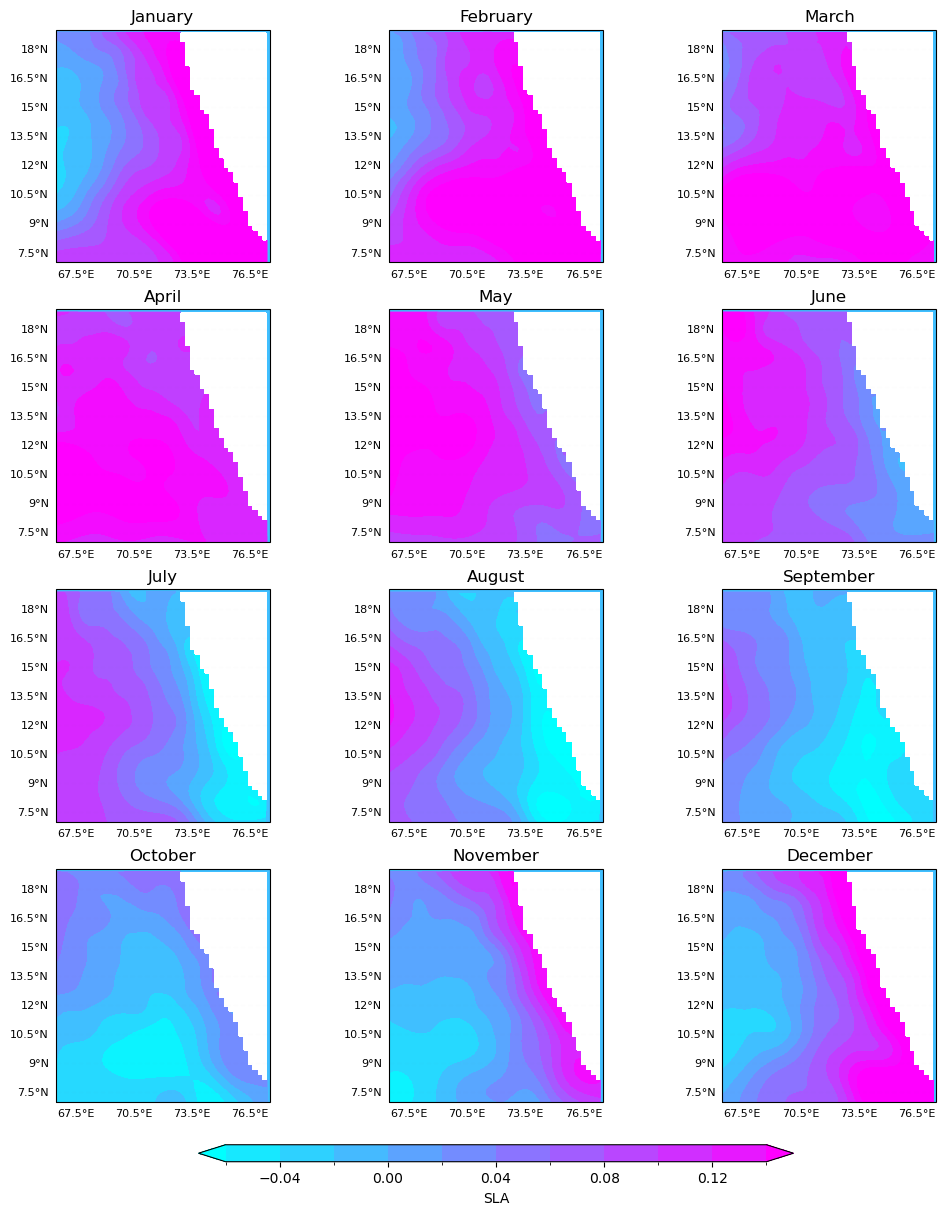

In [52]:
fig, axarr = plt.subplots(nrows=4, ncols=3, figsize=(10,12), constrained_layout=True, subplot_kw={'projection':ccrs.PlateCarree()})
axlist = axarr.flatten()

for i in range(len(z)):
    axlist[i].contourf(x, y, z[i], cmap = 'cool', transform = ccrs.PlateCarree(), levels=levels, extend='both')
    axlist[i].set_title(titles[i], fontsize=12)
norm = BM(levels, 256, extend='both')
fig.colorbar(m.cm.ScalarMappable(norm = norm, cmap='cool'), ax = axlist , \
                orientation = 'horizontal', shrink=0.6, aspect = 35, pad = 0.02, label = 'SLA')
for ax in axlist:
    plot_background(ax)
plt.savefig('slanew_finalPPT.png', dpi=300, bbox_inches='tight')

In [141]:
# chln_may.plot(cbar_kwargs = {"label": "chlorophyll"}, vmin= 0, vmax= 8)
# plt.xlabel("Longitute")
# plt.ylabel("Latitude")
#plt.savefig('chl_june1920.png', dpi=300)

In [142]:
# chln_june.plot(cbar_kwargs = {"label": "chlorophyll"}, vmin= 0, vmax= 8)
# plt.xlabel("Longitute")
# plt.ylabel("Latitude")
#plt.savefig('chl_june1920.png', dpi=300)

In [143]:
# chln_jl.plot(cbar_kwargs = {"label": "chlorophyll"}, vmin= 0, vmax= 8)
# plt.xlabel("Longitute")
# plt.ylabel("Latitude")
#plt.savefig('chl_june1920.png', dpi=300)

In [144]:
# chln_aug.plot(cbar_kwargs = {"label": "chlorophyll"}, vmin= 0, vmax= 8)
# plt.xlabel("Longitute")
# plt.ylabel("Latitude")
#plt.savefig('chl_june1920.png', dpi=300)

In [145]:
# chln_sep.plot(cbar_kwargs = {"label": "chlorophyll"})
# plt.xlabel("Longitute")
# plt.ylabel("Latitude")
#plt.savefig('chl_june1920.png', dpi=300)

In [146]:
# chln_oct.plot(cbar_kwargs = {"label": "chlorophyll"})
# plt.xlabel("Longitute")
# plt.ylabel("Latitude")
#plt.savefig('chl_june1920.png', dpi=300)

In [147]:
# chln_nov.plot(cbar_kwargs = {"label": "chlorophyll"})
# plt.xlabel("Longitute")
# plt.ylabel("Latitude")
#plt.savefig('chl_june1920.png', dpi=300)

In [148]:
# chln_dec.plot(cbar_kwargs = {"label": "chlorophyll"})
# plt.xlabel("Longitute")
# plt.ylabel("Latitude")
#plt.savefig('chl_june1920.png', dpi=300)

In [149]:
# chln_jan.plot(cbar_kwargs = {"label": "chlorophyll"})
# plt.xlabel("Longitute")
# plt.ylabel("Latitude")
#plt.savefig('chl_june1920.png', dpi=300)

In [150]:
# chln_feb.plot(cbar_kwargs = {"label": "chlorophyll"})
# plt.xlabel("Longitute")
# plt.ylabel("Latitude")
#plt.savefig('chl_june1920.png', dpi=300)

In [151]:
# chln_mar.plot(cbar_kwargs = {"label": "chlorophyll"})
# plt.xlabel("Longitute")
# plt.ylabel("Latitude")
#plt.savefig('chl_june1920.png', dpi=300)

In [152]:
# chln_apr.plot(cbar_kwargs = {"label": "chlorophyll"})
# plt.xlabel("Longitute")
# plt.ylabel("Latitude")
# #plt.savefig('chl_june1920.png', dpi=300)

In [153]:
chljan =chln_jan.to_numpy().flatten()
chlfeb =chln_feb.to_numpy().flatten()
chlmar =chln_mar.to_numpy().flatten()
chlapr =chln_apr.to_numpy().flatten()
chlmay =chln_may.to_numpy().flatten()
chljune =chln_june.to_numpy().flatten()
chljl =chln_jl.to_numpy().flatten()
chlaug =chln_aug.to_numpy().flatten()
chlsep =chln_sep.to_numpy().flatten()
chloct =chln_oct.to_numpy().flatten()
chlnov =chln_nov.to_numpy().flatten()
chldec =chln_dec.to_numpy().flatten()

sstjan = sst_jan.to_numpy().flatten()
sstfeb = sst_feb.to_numpy().flatten()
sstmar = sst_mar.to_numpy().flatten()
sstapr = sst_apr.to_numpy().flatten()
sstmay = sst_may.to_numpy().flatten()
sstjune = sst_june.to_numpy().flatten()
sstjl = sst_jl.to_numpy().flatten()
sstaug = sst_aug.to_numpy().flatten()
sstsep = sst_sep.to_numpy().flatten()
sstoct = sst_oct.to_numpy().flatten()
sstnov = sst_nov.to_numpy().flatten()
sstdec = sst_dec.to_numpy().flatten()

slajan = sla_jan.to_numpy().flatten()
slafeb = sla_feb.to_numpy().flatten()
slamar = sla_mar.to_numpy().flatten()
slaapr = sla_apr.to_numpy().flatten()
slamay = sla_may.to_numpy().flatten()
slajune =sla_june.to_numpy().flatten()
slajl = sla_jl.to_numpy().flatten()
slaaug = sla_aug.to_numpy().flatten()
slasep = sla_sep.to_numpy().flatten()
slaoct = sla_oct.to_numpy().flatten()
slanov = sla_nov.to_numpy().flatten()
sladec = sla_dec.to_numpy().flatten()

In [154]:
lat=sst_re.coords['lat'].to_numpy()
lon=sst_re.coords['lon'].to_numpy()

In [155]:
d1={'chln_jan':chljan,'sst_jan':sstjan,'sla_jan':slajan}    #dictionary 
df01= pd.DataFrame(data=d1) 
d2={'chln_feb':chlfeb,'sst_feb':sstfeb,'sla_feb':slafeb}    #dictionary 
df02= pd.DataFrame(data=d2) 
d3={'chln_mar':chlmar,'sst_mar':sstmar,'sla_mar':slamar}    #dictionary 
df03= pd.DataFrame(data=d3) 
d4={'chln_apr':chlapr,'sst_apr':sstapr,'sla_apr':slaapr}    #dictionary 
df04= pd.DataFrame(data=d4) 
d5={'chln_may':chlmay,'sst_may':sstmay,'sla_may':slamay}    #dictionary 
df05= pd.DataFrame(data=d5) 
d6={'chln_june':chljune,'sst_june':sstjune,'sla_june':slajune}    #dictionary 
df06= pd.DataFrame(data=d6) 
d7={'chln_jl':chljl,'sst_jl':sstjl,'sla_jl':slajl}    #dictionary 
df07= pd.DataFrame(data=d7) 
d8={'chln_aug':chlaug,'sst_aug':sstaug,'sla_aug':slaaug}    #dictionary 
df08= pd.DataFrame(data=d8) 
d9={'chln_sep':chlsep,'sst_sep':sstsep,'sla_sep':slasep}    #dictionary 
df09= pd.DataFrame(data=d9) 
d10={'chln_oct':chloct,'sst_oct':sstoct,'sla_oct':slaoct}    #dictionary 
df010= pd.DataFrame(data=d10) 
d11={'chln_nov':chlnov,'sst_nov':sstnov,'sla_nov':slanov}    #dictionary 
df011= pd.DataFrame(data=d11) 
d12={'chln_dec':chldec,'sst_dec':sstdec,'sla_dec':sladec}    #dictionary 
df012= pd.DataFrame(data=d12) 

In [156]:
df06

,chln_june,sst_june,sla_june
0,0.000000,0.000000,0.083693
1,0.000000,302.436035,0.083705
2,0.138665,302.431488,0.083717
3,0.137460,302.429932,0.083729
4,0.139292,302.435944,0.083735
...,...,...,...
83372,0.000000,0.000000,0.000000
83373,0.000000,0.000000,0.000000
83374,0.000000,0.000000,0.000000
83375,0.000000,0.000000,0.000000


In [157]:
# df1.isna().sum()

In [158]:
df01 = df01.apply (pd.to_numeric, errors='coerce') 
df02 = df02.apply (pd.to_numeric, errors='coerce') 
df03 = df03.apply (pd.to_numeric, errors='coerce') 
df04 = df04.apply (pd.to_numeric, errors='coerce') 
df05 = df05.apply (pd.to_numeric, errors='coerce') 
df06 = df06.apply (pd.to_numeric, errors='coerce') 
df07 = df07.apply (pd.to_numeric, errors='coerce') 
df08 = df08.apply (pd.to_numeric, errors='coerce') 
df09 = df09.apply (pd.to_numeric, errors='coerce') 
df010 = df010.apply (pd.to_numeric, errors='coerce') 
df011 = df011.apply (pd.to_numeric, errors='coerce') 
df012 = df012.apply (pd.to_numeric, errors='coerce') 

In [159]:
df1 = df01.dropna()
df2 = df02.dropna()
df3 = df03.dropna()
df4 = df04.dropna()
df5 = df05.dropna()
df6 = df06.dropna()
df7 = df07.dropna()
df8 = df08.dropna()
df9 = df09.dropna()
df10 = df010.dropna()
df11 = df011.dropna()
df12 = df012.dropna()


In [160]:
x6 = df6[['sst_june','chln_june', 'sla_june']].values
x1 = df1[['sst_jan','chln_jan', 'sla_jan']].values
x2 = df2[['sst_feb','chln_feb', 'sla_feb']].values
x3 = df3[['sst_mar','chln_mar', 'sla_mar']].values
x4 = df4[['sst_apr','chln_apr', 'sla_apr']].values
x5 = df5[['sst_may','chln_may', 'sla_may']].values
x7 = df7[['sst_jl','chln_jl', 'sla_jl']].values
x8 = df8[['sst_aug','chln_aug', 'sla_aug']].values
x9 = df9[['sst_sep','chln_sep', 'sla_sep']].values
x10 = df10[['sst_oct','chln_oct', 'sla_oct']].values
x11 = df11[['sst_nov','chln_nov', 'sla_nov']].values
x12 = df12[['sst_dec','chln_dec', 'sla_dec']].values

In [161]:
df8

,chln_aug,sst_aug,sla_aug
0,0.000000,0.000000,0.069146
1,0.000000,301.919037,0.068718
2,0.135428,301.928741,0.068290
3,0.136288,301.928070,0.067861
4,0.132620,301.930115,0.067438
...,...,...,...
83372,0.000000,0.000000,0.000000
83373,0.000000,0.000000,0.000000
83374,0.000000,0.000000,0.000000
83375,0.000000,0.000000,0.000000


In [162]:
df06

,chln_june,sst_june,sla_june
0,0.000000,0.000000,0.083693
1,0.000000,302.436035,0.083705
2,0.138665,302.431488,0.083717
3,0.137460,302.429932,0.083729
4,0.139292,302.435944,0.083735
...,...,...,...
83372,0.000000,0.000000,0.000000
83373,0.000000,0.000000,0.000000
83374,0.000000,0.000000,0.000000
83375,0.000000,0.000000,0.000000


In [163]:
# plt.scatter(df01.sst_jan,df01.chln_jan)
# plt.xlim([297,304])

In [164]:
# plt.scatter(df2.sst_feb,df2.chln_feb)
# plt.xlim([297,304])

In [165]:
# plt.scatter(df3.sst_mar,df3.chln_mar)
# plt.xlim([297,304])

In [166]:
# plt.scatter(df4.sst_apr,df4.chln_apr)
# plt.xlim([297,304])

In [167]:
# plt.scatter(df5.sst_may,df5.chln_may)
# plt.xlim([297,304])

In [168]:
# plt.scatter(df6.sst_june,df6.chln_june)
# plt.xlim([297,304])

In [169]:
# plt.scatter(df7.sst_jl,df7.chln_jl)
# plt.xlim([297,304])

In [170]:
# plt.scatter(df8.sst_aug,df8.chln_aug)
# plt.xlim([297,304])

In [171]:
# plt.scatter(df9.sst_sep,df9.chln_sep)
# plt.xlim([297,304])

In [172]:
# plt.scatter(df10.sst_oct,df10.chln_oct)
# plt.xlim([297,304])

In [173]:
# plt.scatter(df11.sst_nov,df11.chln_nov)
# plt.xlim([297,304])

In [174]:
# plt.scatter(df12.sst_dec,df12.chln_dec)
# plt.xlim([297,304])

In [175]:
# from mpl_toolkits import mplot3d
# import numpy as np
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize = (10, 7))
# ax = plt.axes(projection ="3d")
# ax.scatter3D(df12.sst12, df12.chln12, df12.sla12, color = "pink")
# plt.xlim([298,304])
# plt.show()

In [176]:
# from mpl_toolkits import mplot3d
# import numpy as np
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize = (10, 7))
# ax = plt.axes(projection ="3d")
# ax.scatter3D(df5.sst_may, df5.chln_may, df5.sla_may, color = "orange")
# plt.xlim([300,304])
# ax.set_zlim3d(0, 0.1)
# plt.show()

In [177]:
# from mpl_toolkits import mplot3d
# import numpy as np
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize = (10, 7))
# ax = plt.axes(projection ="3d")
# ax.scatter3D(df7.sst_jl, df7.chln_jl, df7.sla_jl, color = "pink")
# plt.xlim([298,304])
# ax.set_zlim3d(0, 0.1)
# plt.show()

In [178]:
# from mpl_toolkits import mplot3d
# import numpy as np
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize = (10, 7))
# ax = plt.axes(projection ="3d")
# ax.scatter3D(df8.sst_aug, df8.chln_aug, df8.sla_aug, color = "pink")
# plt.xlim([298,302])
# plt.show()

In [179]:
from sklearn.cluster import KMeans

In [180]:
# WCSS = []
# for i in range(1,11):
#     model = KMeans(n_clusters = i,init = 'k-means++')
#     model.fit(x)
#     WCSS.append(model.inertia_)
    
# fig = plt.figure(figsize = (7,7))
# plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
# plt.xticks(np.arange(11))
# plt.xlabel("Number of clusters")
# plt.ylabel("WCSS")
# plt.show()

In [181]:
model6 = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 1, random_state = np.random.RandomState(42))
y6_clusters = model6.fit_predict(x6)

In [182]:
model7 = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 1, random_state = np.random.RandomState(42))
y7_clusters = model7.fit_predict(x7)

In [183]:
model8 = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 1, random_state = np.random.RandomState(42))
y8_clusters = model8.fit_predict(x8)

In [184]:
model9 = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 1, random_state = np.random.RandomState(42))
y9_clusters = model9.fit_predict(x9)

In [185]:
np.shape(x8)

(63771, 3)

In [186]:
# model11 = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
# y11_clusters = model.fit_predict(x11)

In [187]:
# model12 = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
# y12_clusters = model.fit_predict(x12)

In [188]:
# kmeans = KMeans(n_clusters=4)
# kmeans.fit(df6)
# fig = plt.figure(figsize = (10, 7))
# ax = plt.axes(projection ="3d")
# ax.scatter3D(df8.sst_aug, df8.chln_aug, df8.sla_aug, c=kmeans.labels_, cmap= ccmap)

# plt.xlabel("Sea surface temperature (K)")
# plt.ylabel("Chlorophyll-a (mg m$^{-3}$)")
# plt.savefig('cl1.png', dpi=300)

In [189]:
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'midnightblue', label = "cluster 0")
# ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'cyan', label = "cluster 1")
# ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'yellow', label = "cluster 2")
# # ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = 'deeppink', label = "cluster 3")
# # ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'red', label = "cluster 4")

# # ax.legend()
# ax.set_xlim3d(298,303)
# ax.set_zlim3d(-0.05,0.08)
# ax.set_ylim3d(-3,20)
# ax.invert_xaxis()
# ax.xaxis.pane.fill = False
# ax.xaxis.pane.set_edgecolor('white')
# ax.yaxis.pane.fill = False
# ax.yaxis.pane.set_edgecolor('white')
# ax.zaxis.pane.fill = False
# ax.zaxis.pane.set_edgecolor('white')
# # ax.grax.view_init(elev=50, azim=225)
# ax.dist=11
# # ax.grid(False)
# # ax.invert_yaxis()
# plt.show()

In [190]:
# def plot_background(ax):
# #     ax.add_feature(cfeature.COASTLINE, alpha=0.9, lw=0.5)
# #     ax.set_global()
#     # ax.add_feature(cfeature.LAND, color='lightgray')
#     # ax.add_feature(cfeature.OCEAN, color='lightgray')
#     ax.legend()
#     ax.set_xlim3d(298,304.5)
#     ax.set_zlim3d(-0.05,0.1)
#     ax.set_ylim3d(-3,20)
#     ax.invert_xaxis()
# #     ax.invert_yaxis()
#     ax.xaxis.pane.fill = False
#     ax.xaxis.pane.set_edgecolor('white')
#     ax.yaxis.pane.fill = False
#     ax.yaxis.pane.set_edgecolor('white')
#     ax.zaxis.pane.fill = False
#     ax.zaxis.pane.set_edgecolor('white')
#     ax.set_xlabel('SST (K)')
#     ax.set_ylabel('Chl-a (mg/m$^3$)')
#     ax.set_zlabel('SLA (m)')
#     # ax.grax.view_init(elev=50, azim=225)
#     ax.dist=11
#     return ax

In [191]:
# x= [x6,x7,x8,x9]
# y =[y6_clusters,y7_clusters,y8_clusters,y9_clusters]
# titles = ['June', 'July', 'August', 'September']

In [192]:
# fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(12,12), constrained_layout=True, subplot_kw={'projection':'3d'})
# axlist = axarr.flatten()

# axlist[0].scatter(x[0][y[0] == 0,0],x[0][y[0] == 0,1],x[0][y[0] == 0,2], s = 40 , color = 'midnightblue', label = "cluster 0")
# axlist[0].scatter(x[0][y[0] == 1,0],x[0][y[0] == 1,1],x[0][y[0] == 1,2], s = 40 , color = 'red')
# axlist[0].scatter(x[0][y[0] == 2,0],x[0][y[0] == 2,1],x[0][y[0] == 2,2], s = 40 , color = 'cyan', label = "cluster 1")
# axlist[0].scatter(x[0][y[0] == 3,0],x[0][y[0] == 3,1],x[0][y[0] == 3,2], s = 40 , color = 'yellow', label = "cluster 2")
# axlist[0].scatter(x[0][y[0] == 4,0],x[0][y[0] == 4,1],x[0][y[0] == 4,2], s = 40 , color = 'deeppink', label = "cluster 3")

# axlist[1].scatter(x[1][y[1] == 0,0],x[1][y[1] == 0,1],x[1][y[1] == 0,2], s = 40 , color = 'midnightblue', label = "cluster 0")
# axlist[1].scatter(x[1][y[1] == 1,0],x[1][y[1] == 1,1],x[1][y[1] == 1,2], s = 40 , color = 'red')
# axlist[1].scatter(x[1][y[1] == 2,0],x[1][y[1] == 2,1],x[1][y[1] == 2,2], s = 40 , color = 'deeppink', label = "cluster 1")
# axlist[1].scatter(x[1][y[1] == 3,0],x[1][y[1] == 3,1],x[1][y[1] == 3,2], s = 40 , color = 'cyan', label = "cluster 2")
# axlist[1].scatter(x[1][y[1] == 4,0],x[1][y[1] == 4,1],x[1][y[1] == 4,2], s = 40 , color = 'yellow', label = "cluster 3")

# axlist[2].scatter(x[2][y[2] == 0,0],x[2][y[2] == 0,1],x[2][y[2] == 0,2], s = 40 , color = 'cyan', label = "cluster 0")
# axlist[2].scatter(x[2][y[2] == 1,0],x[2][y[2] == 1,1],x[2][y[2] == 1,2], s = 40 , color = 'red')
# axlist[2].scatter(x[2][y[2] == 2,0],x[2][y[2] == 2,1],x[2][y[2] == 2,2], s = 40 , color = 'deeppink', label = "cluster 1")
# axlist[2].scatter(x[2][y[2] == 3,0],x[2][y[2] == 3,1],x[2][y[2] == 3,2], s = 40 , color = 'midnightblue', label = "cluster 2")
# axlist[2].scatter(x[2][y[2] == 4,0],x[2][y[2] == 4,1],x[2][y[2] == 4,2], s = 40 , color = 'yellow', label = "cluster 3")

# axlist[3].scatter(x[3][y[3] == 0,0],x[3][y[3] == 0,1],x[3][y[3] == 0,2], s = 40 , color = 'midnightblue', label = "cluster 0")
# axlist[3].scatter(x[3][y[3] == 1,0],x[3][y[3] == 1,1],x[3][y[3] == 1,2], s = 40 , color = 'red')
# axlist[3].scatter(x[3][y[3] == 2,0],x[3][y[3] == 2,1],x[3][y[3] == 2,2], s = 40 , color = 'deeppink', label = "cluster 1")
# axlist[3].scatter(x[3][y[3] == 3,0],x[3][y[3] == 3,1],x[3][y[3] == 3,2], s = 40 , color = 'yellow', label = "cluster 2")
# axlist[3].scatter(x[3][y[3] == 4,0],x[3][y[3] == 4,1],x[3][y[3] == 4,2], s = 40 , color = 'cyan', label = "cluster 3")
# #     axlist[i].scatter(x[i][y[i] == 4,0],x[i][y[i] == 4,1],x[i][y[i] == 4,2], s = 40 , color = 'red', label = "cluster 4")
# for i in range(len(x)):
#     axlist[i].set_title(titles[i], fontsize=12)
# for ax in axlist:
#     plot_background(ax)
    
# plt.savefig('3d_scat_4culsters_final1.png', dpi=300, bbox_inches='tight')

In [193]:
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x8[y8_clusters == 0,0],x8[y8_clusters == 0,1],x8[y8_clusters == 0,2], s = 40 , color = 'midnightblue', label = "cluster 0")
# ax.scatter(x8[y8_clusters == 1,0],x8[y8_clusters == 1,1],x8[y8_clusters == 1,2], s = 40 , color = 'cyan', label = "cluster 1")
# ax.scatter(x8[y8_clusters == 2,0],x8[y8_clusters == 2,1],x8[y8_clusters == 2,2], s = 40 , color = 'yellow', label = "cluster 2")
# ax.scatter(x8[y8_clusters == 3,0],x8[y8_clusters == 3,1],x8[y8_clusters == 3,2], s = 40 , color = 'deeppink', label = "cluster 3")
# ax.scatter(x8[y8_clusters == 4,0],x8[y8_clusters == 4,1],x8[y8_clusters == 4,2], s = 40 , color = 'red', label = "cluster 4")
# # ax.set_xlabel('Age of a customer-->')
# # # ax.set_ylabel('Anual Income-->')
# # ax.set_zlabel('Spending Score-->')

# ax.legend()
# ax.set_xlim3d(298,303)
# ax.set_zlim3d(-0.05,0.08)
# ax.set_ylim3d(-3,20)
# ax.invert_xaxis()
# ax.xaxis.pane.fill = False
# ax.xaxis.pane.set_edgecolor('white')
# ax.yaxis.pane.fill = False
# ax.yaxis.pane.set_edgecolor('white')
# ax.zaxis.pane.fill = False
# ax.zaxis.pane.set_edgecolor('white')
# # ax.grax.view_init(elev=50, azim=225)
# ax.dist=11
# # ax.grid(False)
# # ax.invert_yaxis()
# plt.show()

In [194]:
type(model6.labels_)

numpy.ndarray

In [195]:
np.shape(model6.labels_)

(63779,)

In [196]:
# np.unique(model.labels_)

In [197]:
# df8

In [198]:
# df12['model.labels'] = model.labels_  
#to do
df6['model.labels'] = model6.labels_  
df7['model.labels'] = model7.labels_  
df8['model.labels'] = model8.labels_  
df9['model.labels'] = model9.labels_  

C:\Users\hp\AppData\Local\Temp\ipykernel_20204\3606403286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['model.labels'] = model6.labels_
C:\Users\hp\AppData\Local\Temp\ipykernel_20204\3606403286.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['model.labels'] = model7.labels_
C:\Users\hp\AppData\Local\Temp\ipykernel_20204\3606403286.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [199]:
df6.rename({'chln_june':'chln6','sst_june':'sst6','sla_june':'sla6'},axis=1, inplace=True)
df1.rename({'chln_jan':'chln1','sst_jan':'sst1','sla_jan':'sla1'},axis=1, inplace=True)
df2.rename({'chln_feb':'chln2','sst_feb':'sst2','sla_feb':'sla2'},axis=1, inplace=True)
df3.rename({'chln_mar':'chln3','sst_mar':'sst3','sla_mar':'sla3'},axis=1, inplace=True)
df4.rename({'chln_apr':'chln4','sst_apr':'sst4','sla_apr':'sla4'},axis=1, inplace=True)
df5.rename({'chln_may':'chln5','sst_may':'sst5','sla_may':'sla5'},axis=1, inplace=True)
df7.rename({'chln_jl':'chln7','sst_jl':'sst7','sla_jl':'sla7'},axis=1, inplace=True)
df8.rename({'chln_aug':'chln8','sst_aug':'sst8','sla_aug':'sla8'},axis=1, inplace=True)
df9.rename({'chln_sep':'chln9','sst_sep':'sst9','sla_sep':'sla9'},axis=1, inplace=True)
df10.rename({'chln_oct':'chln10','sst_oct':'sst10','sla_oct':'sla10'},axis=1, inplace=True)
df11.rename({'chln_nov':'chln11','sst_nov':'sst11','sla_nov':'sla11'},axis=1, inplace=True)
df12.rename({'chln_dec':'chln12','sst_dec':'sst12','sla_dec':'sla12'},axis=1, inplace=True)
# df.rename({'chln_june':'chln6','sst_june':'sst6','sla_june':'sla6'},axis=1, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_20204\3590212202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.rename({'chln_june':'chln6','sst_june':'sst6','sla_june':'sla6'},axis=1, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_20204\3590212202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename({'chln_jan':'chln1','sst_jan':'sst1','sla_jan':'sla1'},axis=1, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_20204\3590212202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [200]:
df6join = pd.concat([df06, df6], join = "outer", axis=1)
df6join.drop(columns = ['chln6', 'sst6', 'sla6'], inplace= True)
df1join = pd.concat([df01, df1], join = "outer", axis=1)
df1join.drop(columns = ['chln1', 'sst1', 'sla1'], inplace= True)
df2join = pd.concat([df02, df2], join = "outer", axis=1)
df2join.drop(columns = ['chln2', 'sst2', 'sla2'], inplace= True)
df3join = pd.concat([df03, df3], join = "outer", axis=1)
df3join.drop(columns = ['chln3', 'sst3', 'sla3'], inplace= True)

df4join = pd.concat([df04, df4], join = "outer", axis=1)
df4join.drop(columns = ['chln4', 'sst4', 'sla4'], inplace= True)
df5join = pd.concat([df05, df5], join = "outer", axis=1)
df5join.drop(columns = ['chln5', 'sst5', 'sla5'], inplace= True)
df7join = pd.concat([df07, df7], join = "outer", axis=1)
df7join.drop(columns = ['chln7', 'sst7', 'sla7'], inplace= True)

df8join = pd.concat([df08, df8], join = "outer", axis=1)
df8join.drop(columns = ['chln8', 'sst8', 'sla8'], inplace= True)
df9join = pd.concat([df09, df9], join = "outer", axis=1)
df9join.drop(columns = ['chln9', 'sst9', 'sla9'], inplace= True)
df10join = pd.concat([df010, df10], join = "outer", axis=1)
df10join.drop(columns = ['chln10', 'sst10', 'sla10'], inplace= True)

df11join = pd.concat([df011, df11], join = "outer", axis=1)
df11join.drop(columns = ['chln11', 'sst11', 'sla11'], inplace= True)
df12join = pd.concat([df012, df12], join = "outer", axis=1)
df12join.drop(columns = ['chln12', 'sst12', 'sla12'], inplace= True)

In [201]:
karray6 = df6join['model.labels'].to_numpy()
# karray1 = df1join['model.labels'].to_numpy()
# karray2 = df2join['model.labels'].to_numpy()
# karray3 = df3join['model.labels'].to_numpy()
# karray4 = df4join['model.labels'].to_numpy()
# karray5 = df5join['model.labels'].to_numpy()
karray7 = df7join['model.labels'].to_numpy()
karray8 = df8join['model.labels'].to_numpy()
karray9 = df9join['model.labels'].to_numpy()
# karray10 = df10join['model.labels'].to_numpy()
# karray11 = df11join['model.labels'].to_numpy()
# karray12 = df12join['model.labels'].to_numpy()

In [202]:
karray62d = np.reshape(karray6, (301,277))
# karray12d = np.reshape(karray1, (301,277))
# karray22d = np.reshape(karray2, (301,277))
# karray32d = np.reshape(karray3, (301,277))
# karray42d = np.reshape(karray4, (301,277))
# karray52d = np.reshape(karray5, (301,277))
karray72d = np.reshape(karray7, (301,277))
karray82d = np.reshape(karray8, (301,277))
karray92d = np.reshape(karray9, (301,277))
# karray102d = np.reshape(karray10, (301,277))
# karray112d = np.reshape(karray11, (301,277))
# karray122d = np.reshape(karray12, (301,277))

In [237]:
from matplotlib.colors import ListedColormap
ccmap = ListedColormap([ "midnightblue","red","deeppink","yellow", "cyan"])
# ccmap = ListedColormap([ "midnightblue", "cyan", "yellow","deeppink","red"])

In [238]:
clusters = xr.DataArray(
    data=karray92d,
    dims=["lat", "lon"],
    coords=dict(
        lon=(["lon"], lon),
        lat=(["lat"], lat),
    ),
)

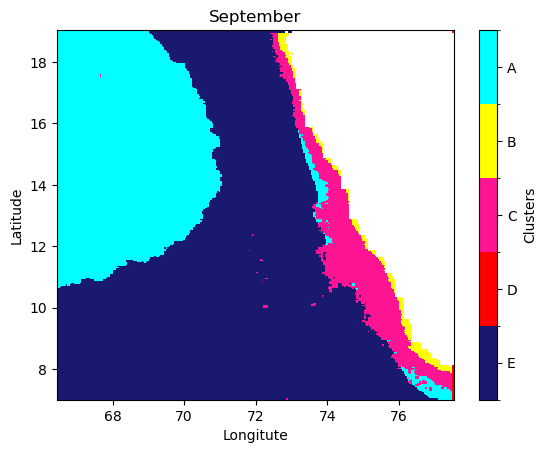

In [239]:
mesh = clusters.plot(levels = [0,1,2,3,4,5], add_colorbar = False, cmap= ccmap)
cbar = plt.colorbar(mesh, label = "Clusters")
cbar.set_ticks([0.5, 1.5, 2.5,3.5,4.5])
cbar.set_ticklabels(["E","D","C", "B", "A"])
plt.title('September')
plt.xlabel("Longitute")
plt.ylabel("Latitude")
plt.savefig('map_sept_clusterff.png', dpi=300)
# plt.show()

In [206]:
# from sklearn.cluster import KMeans

# inertias = []

# for i in range(1,11):
#     kmeans = KMeans(n_clusters=i)
#     kmeans.fit(df1)
#     inertias.append(kmeans.inertia_)

# plt.plot(range(1,11), inertias, marker='o')
# plt.title('Elbow method')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.savefig('elbow.png', dpi=300)

In [207]:
# from matplotlib.colors import ListedColormap
# ccmap = ListedColormap([ "midnightblue", "cyan", "yellow","deeppink"])

In [208]:
# kmeans = KMeans(n_clusters=4)
# kmeans.fit(df1)

# plt.scatter(df1.sst1,df1.chln1, c=kmeans.labels_, cmap= ccmap)

# plt.xlabel("Sea surface temperature (K)")
# plt.ylabel("Chlorophyll-a (mg m$^{-3}$)")
# plt.title('January')
# plt.xlim([297,304])
# plt.savefig('2d1.png', dpi=300)

# d1={'chln_jan':chljan,'sst_jan':sstjan,'sla_jan':slajan}    #dictionary 
# df01= pd.DataFrame(data=d1) 

In [209]:
# kmeans = KMeans(n_clusters=4)
# kmeans.fit(df6)

# plt.scatter(df6.sst6,df6.chln6, c=kmeans.labels_, cmap= ccmap)

# plt.xlabel("Sea surface temperature (K)")
# plt.ylabel("Chlorophyll-a (mg m$^{-3}$)")
# plt.title('June')
# plt.xlim([297,304])
# plt.savefig('2d6.png', dpi=300)

In [210]:
# kmeans = KMeans(n_clusters=4)
# kmeans.fit(df7)

# plt.scatter(df7.sst7,df7.chln7, c=kmeans.labels_, cmap= ccmap)

# plt.xlabel("Sea surface temperature (K)")
# plt.ylabel("Chlorophyll-a (mg m$^{-3}$)")
# plt.title('July')
# plt.xlim([297,304])
# plt.savefig('2d7.png', dpi=300)

In [211]:
# kmeans = KMeans(n_clusters=4)
# kmeans.fit(df8)

# plt.scatter(df8.sst8,df8.chln8, c=kmeans.labels_, cmap= ccmap)

# plt.xlabel("Sea surface temperature (K)")
# plt.ylabel("Chlorophyll-a (mg m$^{-3}$)")
# plt.title('August')
# plt.xlim([297,304])
# plt.savefig('2d8.png', dpi=300)

In [212]:
# kmeans = KMeans(n_clusters=4)
# kmeans.fit(df9)

# plt.scatter(df9.sst9,df9.chln9, c=kmeans.labels_, cmap= ccmap)

# plt.xlabel("Sea surface temperature (K)")
# plt.ylabel("Chlorophyll-a (mg m$^{-3}$)")
# plt.title('September')
# plt.xlim([297,304])
# plt.savefig('2d9.png', dpi=300)

In [213]:
# df9['kmeans.labels'] = kmeans.labels_
# df9['kmeans.labels'] = kmeans.labels_
# df9['kmeans.labels'] = kmeans.labels_
# df9['kmeans.labels'] = kmeans.labels_

In [214]:
# df26join = pd.concat([df06, df6], join = "outer", axis=1)
# df26join.drop(columns = ['chln6', 'sst6'], inplace= True)

# df27join = pd.concat([df07, df7], join = "outer", axis=1)
# df27join.drop(columns = ['chln7', 'sst7'], inplace= True)

# df28join = pd.concat([df08, df8], join = "outer", axis=1)
# df28join.drop(columns = ['chln8', 'sst8'], inplace= True)

# df29join = pd.concat([df09, df9], join = "outer", axis=1)
# df29join.drop(columns = ['chln9', 'sst9'], inplace= True)


In [215]:
# df26join